<a href="https://colab.research.google.com/github/lehai-ml/Workshop_AI/blob/master/Machine_Learning_Workshop_1_Hot_Dog_vs_Not_Hot_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Machine Learning workshop: 1*

*KCL AI Soc: Le Hai* (le.hai@kcl.ac.uk)

Today we will look at the big picture of Machine Learning, and at one of its many applications: Image Classification. And to make an example we will create a Hotdog vs. Not-Hotdog classifier (Inspired by HBO's Silicon Valley show:)/ as well as production and employment on the web.


Collecting data: There are many ways to download the data, depending on how you want to store them. In this lesson, we will use existing fast.ai (another great source to learn ML) library to pull images directly from Google Images.

First turns on GPU to run faster:
Edit/Notebook settings and choose GPU under Hardware accelerator

In [ ]:
from fastai.vision import *

## 1. Collecting data

###1.A. Get a list of URLs

* Go to Google Images and search for the images you are interested in. In this case we need images for **Hotdog** (key terms: *Hotdog, sausages, frankfuter, etc.*) and **Not-hotdog**(key terms: *snakes, cucumber, eggplants, babies etc.).* 
* Scroll down until you have seen all the images you want to download.
* Limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

###1.B Pull all images URL into a file
* Press `Ctrl +  Shift + J ` in Windows/Linux and `Cmd + Opt + C` in Mac, and a window 'Javascript Console' will appear. That is where you will paste the following command:
```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```


* A new page will appear with all the URLs of your desired images. Copy those into a .csv file and save it. (open text editor, copy in , and save it under .csv extension). Remember no space in your name.

For this exercise: you can download the Hot_dog.csv, and Not_Hot_dog.csv from here:
Hot_dog.csv-https://drive.google.com/open?id=1BP4LpIcTa4crFBLmFoonEQf007CJLKrJ
Not_Hot_dog.csv-https://drive.google.com/open?id=1pyTEAEvNpyU-B_kozk3MlS6q2V13kgpo

###1.C Create folders on the cloud and download images

####Hot dog images
* Create folder `/data/Hot_dog`, and upload `Hotdog.csv` to data folder
* Download Hot dog images to your `Hot_dog` folders.

Remember: your file name matters!

In [ ]:
folder='Hot_dog'
file='Hotdog.csv'

In [ ]:
path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

Now upload your Hot_dog.csv file to the data folder (just drag and drop)

In [ ]:
download_images(path/file, dest, max_pics=200)

Error https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_600,h_440/https://www.thatskinnychickcanbake.com/wp-content/uploads/2017/07/Bacon-Wrapped-Hot-Dogs-with-Fruit-Salsa-5-600x440.jpg HTTPSConnectionPool(host='cdn.shortpixel.ai', port=443): Read timed out. (read timeout=4)
Error http://www.kroger.com/asset/5b070aad84ae05aa1aa1de57?data=1 HTTPConnectionPool(host='www.kroger.com', port=80): Max retries exceeded with url: /asset/5b070aad84ae05aa1aa1de57?data=1 (Caused by ReadTimeoutError("HTTPConnectionPool(host='www.kroger.com', port=80): Read timed out. (read timeout=4)",))


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


####Not Hot dog images
Repeat the same thing

In [ ]:
folder='Not_Hot_dog'
file='Not_Hot_Dog.csv'

In [ ]:
path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

Now upload your Not_hot_dog.csv file to the data folder (just drag and drop)

In [ ]:
download_images(path/file, dest, max_pics=200)

###1.D. Delete any images that cannot be opened or faulty.

In [ ]:
classes = ['Hot_dog','Not_Hot_dog'] #the classes names must match the folders' name

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

##2. View and prepare Data for training process

You can now view data:
The following code will:
1. Call the images from the folders in the provided path.
2. Use those images as training set, with 20% being a validation test.
3. Distort the images in order to make the model perform better (for example, we will make the images off-center, or flipped upside-down; this step essentially "increases" our dataset.)
4. We set our target size as 224x224. (we don't need too hi-def pictures)
5. We set the batch size (or size of the training set each time we train the model (we don't want to let the model to see all the images at once, but rather train and improve after each new batch)). The batch size also depends on the number of data you have.

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

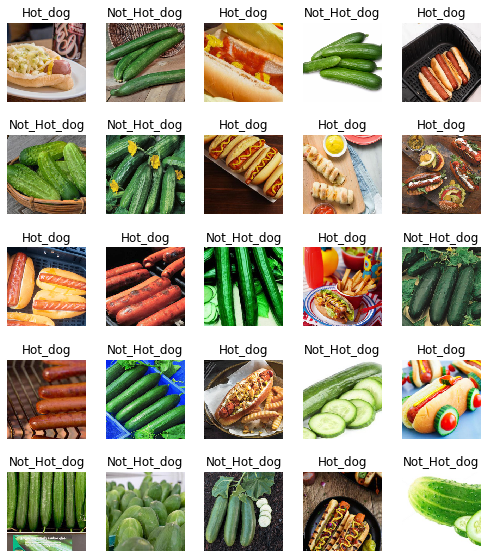

In [ ]:
data.show_batch(row=3,figsize=(7,8))

In [ ]:
data

ImageDataBunch;

Train: LabelList (297 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Hot_dog,Hot_dog,Hot_dog,Hot_dog,Hot_dog
Path: data;

Valid: LabelList (74 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Not_Hot_dog,Hot_dog,Hot_dog,Not_Hot_dog,Hot_dog
Path: data;

Test: None

##3. Train Model

Next we want to train our model using a **Convolutional Neural Network** (don't worry about what this is for now) and more specifically a model called Resnet34.

Here we will:
1. Pass our data (series of batches of images) to the CNN
2. Our CNN model will train with the data and its **objective** is to minimize the error rate.


In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 95.2MB/s]


3. Now we define how long we want our model to train for (how many epoch).

**Note:** Few things to consider: 1) you have to define your learning rate (if the learning rate is too high, the model might never achieve global minimum, if the learning rate is too low, it might take too long time, and it might end up in local minimum). 2) your epoch time: if you stop the model too soon, the model might not have reach global minimum, but if you stop your epoch time too late, the model might get worsen. **Generally** the default settings are quite good.

4. Let see how it performs after 4 epochs:

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.747987,0.085034,0.040541,0.959459,00:09
1,0.408828,0.010119,0.000000,1.000000,00:07
2,0.267072,0.005652,0.000000,1.000000,00:07
3,0.195026,0.005890,0.000000,1.000000,00:07


As you can see we have achieved 97% accuracy after only 4 epochs. Would running more benefit the model?

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

The confusion matrix

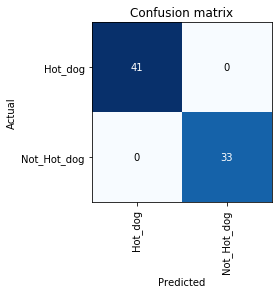

In [ ]:
interp.plot_confusion_matrix()

Good job, you have got yourself a Hot-Dog, Not-Hot-Dog Classifier. You can now save the trained model and deploy it.

In [ ]:
learn.save('Hotdogclassifier')
learn.export('Hotdogclassifier.pkl')

# Extra material: Model deployment
To deploy your model, you can host it on free cloud services like Render. See instruction below:
1. https://medium.com/datadriveninvestor/fastai-and-render-quick-and-easy-way-to-create-and-deploy-computer-vision-models-14fd3f903cfc
2. https://course.fast.ai/deployment_render.html


You also might need a Github account to deploy your model.

Here is an example:

https://hot-dog-classifier.onrender.com



